In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)

In [3]:
## Create dataset
X,Y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

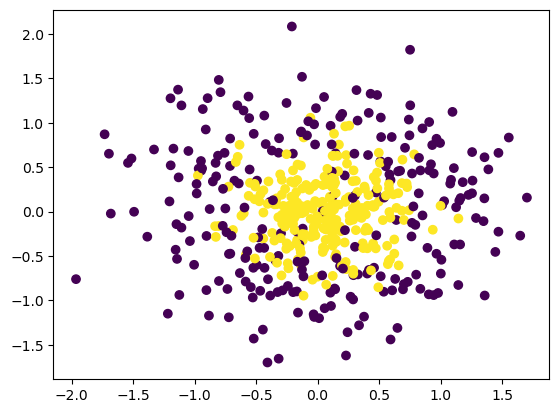

In [5]:
## Visualize
plt.scatter(X[:,0],X[:,1],c=Y)

In [7]:
## Apply adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

## cross_val_score
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(abc,X,Y,cv=10,scoring='accuracy')) 

0.786

Accuracy=78% without any hyperparameter tuning i.e. default parameters.

In [9]:
abc.fit(X,Y)

AdaBoostClassifier()

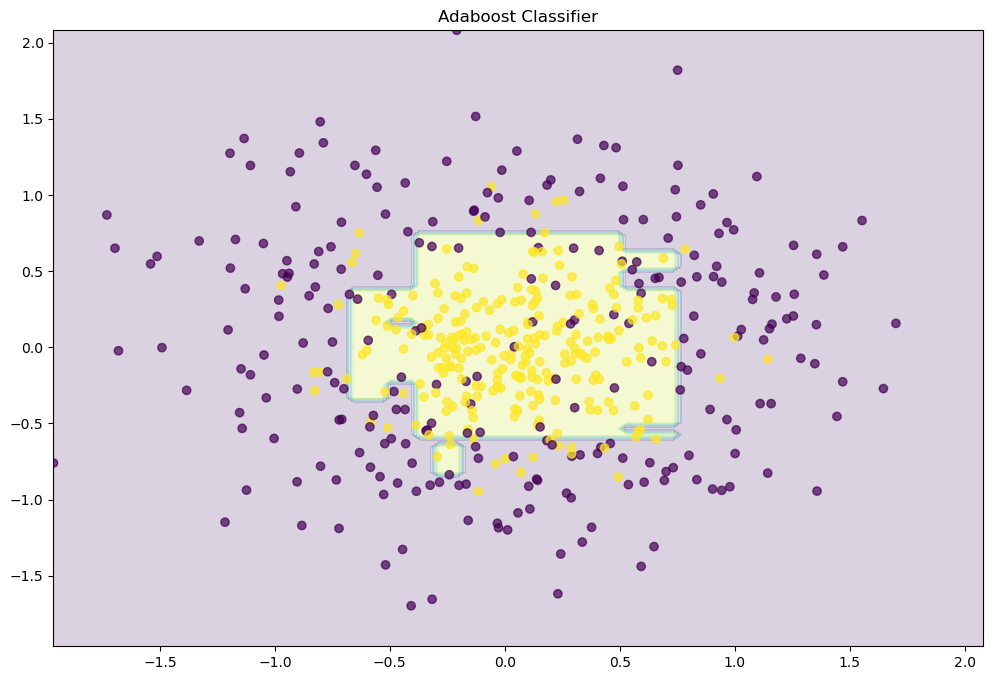

In [10]:
## Plot decision boundries
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

We could see few errors in decision boundries. Now lets try tuning the hyperparameters.

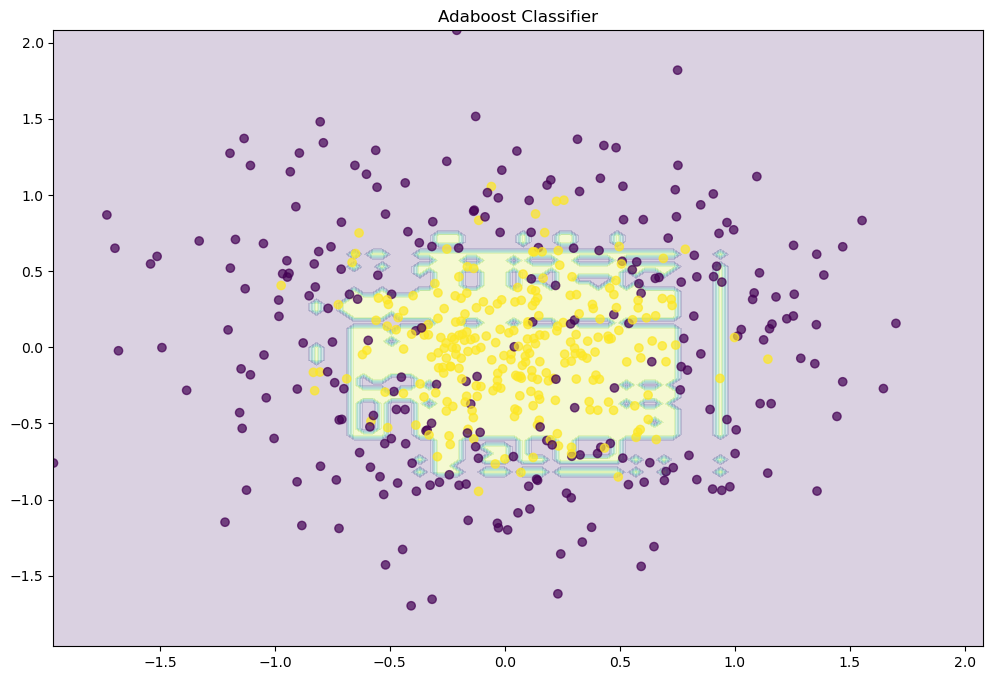

In [14]:
abc=AdaBoostClassifier(n_estimators=1000)
abc.fit(X,Y)
plot_decision_boundary(abc)

With very small value of n_estimators we could observe clear cut case of underfitting, too much high values of n_estimatior will lead to overfitting ,both are not expected scenarios. We have to have moderate value for n_estimators for which we are not having underfitting nor overfitting.

When we calculate alpha, we use formula
alpha= 1/2*log((1-e)/e)
Now learning rate multiplies with alpha in original formula so by default the learning rate =1. Now if we reduce learning rate to 0.1 then our alpha also will reduce to 10%. Reducing alpha will result in shrinkage. This means, we were using alpha for updating the weights so amplitude of increase or decrease will minimize i.e. if new_wt was decreasing then it will decrease by less amount and if it was increasing then it will increase by less amount. The idea behind this is to reduce the learning speed so as to avoid the situations of dramatic overfitting.

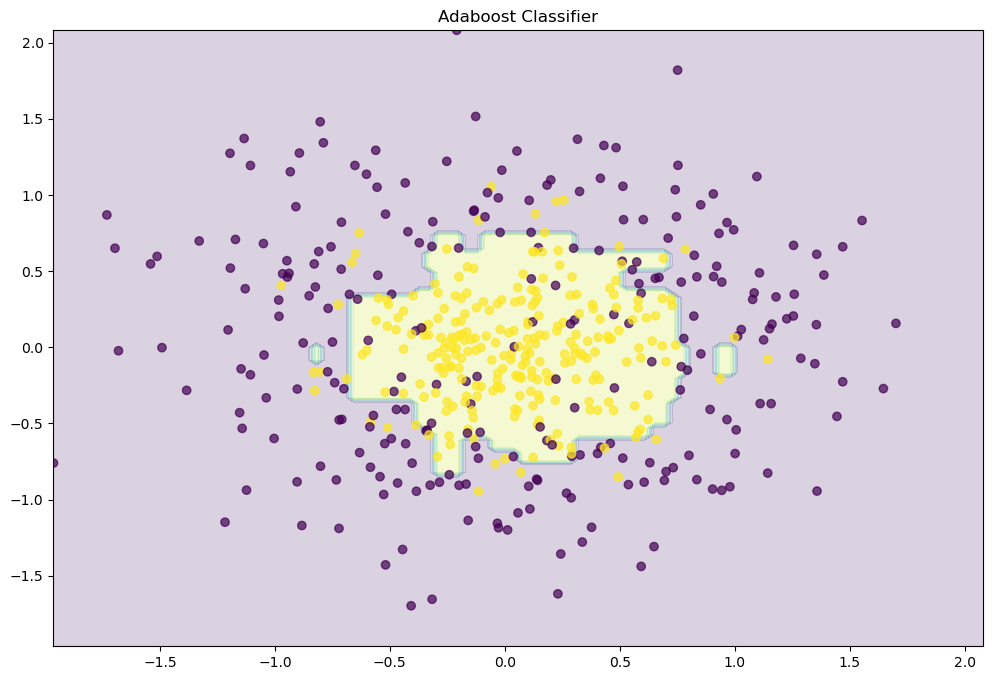

In [15]:
abc=AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
abc.fit(X,Y)
plot_decision_boundary(abc)

Now here we have n_estimators=1000, previously we did not have learning rate so with n_estimators=1000, we were getting a overfitted model but now as we have learning rate as 0.1 and same n_estimators=1000 then we could see overfitting is reduced. Thats the task of learning rate. Thus learning rate is called as a shrinkage parameter.

In [17]:
## Grid search application
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
